# FALL 2020 -> CSE 6363 -> Machine Learning
## Assignment 2
### Problem 1
### Name:  Tirumala Manukonda (UTA ID# 1001662386)

#### Implementing logistic regression using sigmoid function and cross entropy

__Summary__:

- Generate Train and test data sets each of 1000 values using the mu and sigma values
- Assign the labels 0 and 1 for 500 each of set 0 and set 1 of Train data and similarly for the test data
- Implement the logistic regression using sigmoid function and logloss function
 -  Sigmoid transforms the values between the range 0 and 1.
    -   Here is the mathematical expression for sigmoid
           - f(x) = 1/(1+e^-x)
 -  LoglossFunction,measures the performance of a classification model whose output is a probability value
    between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 
- Calculate the accuracy of the model
- Plot ROC Curve graph and define the AUC Area Under Curve for the model
- Plot The graph between the no of iterations and the learning rate
 

In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math
from math import sin, cos, pi
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# Generating the training data sets of 500 each with labels of 0 and 1 and then creatinig the Train_df using the two sets of data

mu1 = [1,0]
mu2 = [0,1]

sig1 = [[1,0.75],[0.75,1]]
sig2 = [[1,-0.5],[0.5,1]]

Train_set0 = np.append(np.random.multivariate_normal(mu1,sig1,500),np.zeros((500,1)),axis=1)
Train_set1 = np.append(np.random.multivariate_normal(mu2,sig2,500),np.ones((500,1)),axis=1)
Train_df0 = pd.DataFrame(list(Train_set0))
Train_df1 = pd.DataFrame(list(Train_set1)) 
Train_df = pd.concat([Train_df0, Train_df1])
Train_df

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
0,0.212444,0.855727,0.0
1,0.637727,0.435474,0.0
2,-0.494941,-1.369267,0.0
3,2.185535,-0.238430,0.0
4,1.316381,0.483306,0.0
...,...,...,...
495,0.805814,1.238442,1.0
496,-0.897160,0.127493,1.0
497,0.634147,0.758415,1.0
498,-0.820484,1.475674,1.0


- Generated 1000 samples of training data using mu1,sig1 and mu2,sig2 each with 500 samples assigned with labels of 0 and 1 

In [3]:
#Selecting features and labels arrays:
X_train = Train_df.iloc[:, 0:2].values
y_train = Train_df.iloc[:, 2].values

- Dividing the training data into fetaures and labels 

In [4]:
mu1 = [1,0]
mu2 = [0,1]

sig1 = [[1,0.75],[0.75,1]]
sig2 = [[1,-0.5],[0.5,1]]

Test_set0 = np.append(np.random.multivariate_normal(mu1,sig1,500),np.zeros((500,1)),axis=1)
Test_set1 = np.append(np.random.multivariate_normal(mu2,sig2,500),np.ones((500,1)),axis=1)
Test_df0 = pd.DataFrame(list(Test_set0))
Test_df1 = pd.DataFrame(list(Test_set1)) 
Test_df = pd.concat([Test_df0, Test_df1])
Test_df

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


,0,1,2
0,0.209091,-1.267501,0.0
1,1.412381,0.071145,0.0
2,2.336955,0.849171,0.0
3,0.192879,-0.474227,0.0
4,1.450578,-0.125199,0.0
...,...,...,...
495,-1.357493,1.067331,1.0
496,-0.664679,1.616900,1.0
497,0.244903,1.250405,1.0
498,0.468392,0.942518,1.0


- Generated 1000 samples of test data using mu1,sig1 and mu2,sig2 each with 500 samples assigned with labels of 0 and 1 

In [5]:
#Selecting features and labels arrays:
X_test = Test_df.iloc[:, 0:2].values
y_test = Test_df.iloc[:, 2].values

- Dividing the test data into fetaures and labels 

In [6]:
#Implementation of logistic Regression model which uses Sigmoid function and Cross entropy loss function

class LogisticRegression:
    
    #Learning rate = 0.01
    #max number of iterations is 10000
    #fit_intercept = a boolean to indicate whether we are adding the base X0 featurevector
    def __init__(self, learning_rate=0.01, num_iter=10000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate  
        self.num_iter = num_iter 
        self.fit_intercept = fit_intercept 
        self.verbose = verbose  
    
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  
        return np.concatenate((intercept, X), axis=1)  
    
    #Sigmoid Activation Function
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #log loss Function
    def _loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    #Function Training the algorithm
    def train(self, X, y):
        if self.fit_intercept:
            X = self._add_intercept(X)  
        self._weights = np.zeros(X.shape[1])  
        
        for i in range(self.num_iter):  
            z = np.dot(X, self._weights)  
            h = self._sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self._weights -= self.learning_rate * gradient
            
            if (self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self._weights)
                h = self._sigmoid(z)
                print(f'loss: {self._loss(h, y)} \t')

    def predict_prob(self, X):  
        if self.fit_intercept:
            X = self._add_intercept(X)
    
        return self._sigmoid(np.dot(X, self._weights))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [7]:
#Train the model with training data with parameters as 0.0001 and max iteration=100000
logit = LogisticRegression(learning_rate= 0.0001, num_iter=10000)
logit.train(X_train, y_train)
y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]
score = accuracy_score(y_test, y_pred)
print(score)

0.834


#### _Analysis_:- 
- Accuracy score is around 84% which says that the model is decent in classifying the labels

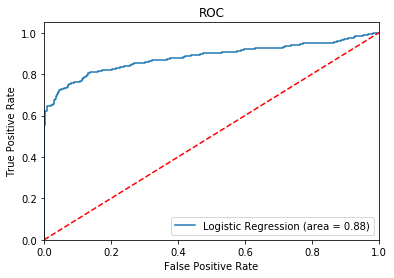

Area under Curve:0.8819079999999999


In [8]:
y_pred_probs = logit.predict_prob(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('Area under Curve:'+ repr(logit_roc_auc) )


#### _Analysis_:
- Above plot shows the model has 0.889228 Area Under Curve and ROC is also looking good

0.843
0.843
0.843
0.843
0.843


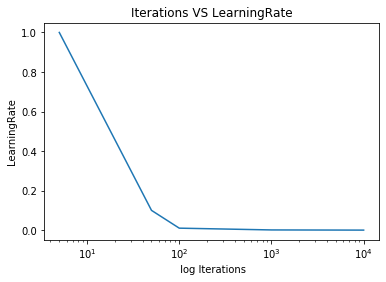

In [152]:

#when learning rate = 1
logit = LogisticRegression(learning_rate= 1,num_iter=5)
logit.train(X_train, y_train)
y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]
score = accuracy_score(y_test, y_pred)
print(score)

#when learning rate = 0.1
logit = LogisticRegression(learning_rate= 0.1,num_iter=50)
logit.train(X_train, y_train)
y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]
score = accuracy_score(y_test, y_pred)
print(score)

#when learning rate = 0.01
logit = LogisticRegression(learning_rate= 0.01,num_iter=100)
logit.train(X_train, y_train)
y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]
score = accuracy_score(y_test, y_pred)
print(score)

#when learning rate = 0.001
logit = LogisticRegression(learning_rate= 0.001,num_iter=1000)
logit.train(X_train, y_train)
y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]
score = accuracy_score(y_test, y_pred)
print(score)

##when learning rate = 0.0001
logit = LogisticRegression(learning_rate= 0.0001,num_iter=10000)
logit.train(X_train, y_train)
y_pred = [int(round(x)) for x in logit.predict_prob(X_test).flatten()]
score = accuracy_score(y_test, y_pred)
print(score)
Iterations = [10000,1000,100,50,5]
LearningRate = [0.0001,0.001,0.01,0.1,1]
plt.plot((Iterations),LearningRate)
plt.xscale("log")
plt.xlabel(" log Iterations")
plt.ylabel("LearningRate")
plt.title("Iterations VS LearningRate")
plt.show()

#### _Analysis_:
- Took accuracy 0.843 is as the standard measure and then calculated the iterations vs Learning rate
- For the learning as 1, it took very less no of iterations to give the best accuracy score and as the learning rate decreases the no of iterations kept increasing 